# Social Networks as Graphs

(a) represent social networks as graphs, (b) visualize them using a Python package called NetworkX, and (c) spread information over a social network. 

 <a href="http://networkx.github.io/documentation/latest/install.html">install NetworkX</a>. Use the command: `pip install networkx --user` to install NetworkX on your machine. Many of you may already have NetworkX because it comes with the Anaconda installation of iPython. Click <a href="http://networkx.readthedocs.org/en/networkx-1.11/tutorial/tutorial.html">here</a> for a good tutorial on NetowrkX.



##  Representing Social Networks in Software

A social network is mathematically represented by a graph $$G = (V,E)$$ where $V$ represents the set of nodes and $E$ denotes the set of edges in the graph. A user is represented by a node $u \in V$ and a
friendship between users $u$ and $v$ is represented by an edge $(u,v) \in E$. In other
words, if users $u$ and $v$ are friends, then there is an edge between nodes
$u$ and $v$ (i.e., $(u,v) \in E$).

In software, a graph $G$ is represented by an adjacency list `A` of size
$|V|$, the number of nodes in $G$. The $u^{th}$ entry of `A` contains the
list of nodes $u$ is connected to. Therefore, `A` is a list of lists. In this
 read a file which describes a social network and form its adjacency list. Each line in the file contains
data of the form `u v c d`. This means that nodes $u$ and $v$ are
connected to each other (i.e., for nodes $u,v \in V$ we have that $(u,v) \in
E$). Ignore `c` and `d` as they do not contain any relevant information.

Write a function called `build_adjacency` that accepts
`filename`, `min_degree`, and `num_nodes` as input
parameters and returns `adjacency` as output. Start by declaring a
list (of empty lists) of size `num_nodes` and then open the file
`filename` which contains the social network. The social network data
is stored in `out.facebook-wosn-links` which can be found on the
course webpage. When reading the file `out.facebook-wosn-links`,
consider the first `num_nodes` and ignore the rest. After forming the
adjacency list for the first `num_nodes` nodes, ignore (delete) all the nodes
that have less than `min_degree` friends. For example, assume node
`u` has less than `min_degree` neighbors, then set
`adjacency[u] = []` and remove node `u` from its neighbors' lists.
Finally, return the updated `adjacency` list.

In [1]:
import re
from copy import deepcopy
def build_adjacency(filename, min_degree, num_nodes):
    adjacency =[]
    #adjacency = [[] for i in range(num_nodes)]
    l=[]
    f=open(filename,'r')#read the text file and store it in f
    for line in f:
        l.append(line.rstrip().split(','))
    graph={}# each node is key and its neighbors are the values
    for i in l:
        y=[]
        y=i[0].split()
        y=map(int,y)
        del y[2]#deleting nodes which are not required from text file
        del y[2]
        if y[0]>num_nodes:#consider the first num_nodes and ignore the rest
            break;
        if y[0]<=num_nodes and y[1]<=num_nodes:
            for key in y:
                if key not in graph.keys():
                    graph.setdefault(key, [])
                neighbour=y[1]
                if key==y[1]:
                    neighbour=y[0]
                graph[key].append(neighbour)
    del_nodes=[]#for deleting keys/nodes which have less neighbors than min_degree 
    #check graph and remove keys whose whose corresponding value list 
    #has a length less than min_degree
    for key in graph.keys():
        if len(graph[key])<min_degree:
            graph[key]=[]
            #print key,' ',graph[key]
            if key not in del_nodes:
                del_nodes.append(key)
    #print del_nodes
    #go through the graph again 
    #and for each key remove values which are in del_nodes list
    for keyx in graph.keys():
        #print graph[keyx]
        keyx_copy=deepcopy(graph[keyx])
        #print 'ok'
        for k in keyx_copy:
            if k in del_nodes:
                graph[keyx].remove(k)#removing those values in keys which are in del_nodes list 
        #if check(graph, min_degree)==False:
            #x=False
    adjacency=graph.values()#list containing graph value lists
    return adjacency



----

##Visualizing Social Networks

 use `draw_graph`

In [2]:
from pylab import *
import random as rnd
import networkx as nx
from __future__ import division

rcParams['figure.figsize'] = 12, 12  # that's default image size for this interactive session

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):
    """ 
    Based on: https://www.udacity.com/wiki/creating-network-graphs-with-python
    We describe a graph as a list enumerating all edges.
    Ex: graph = [(1,2), (2,3)] represents a graph with 2 edges - (node1 - node2) and (node2 - node3)
    """
    
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)
    # show graph
    plt.show()

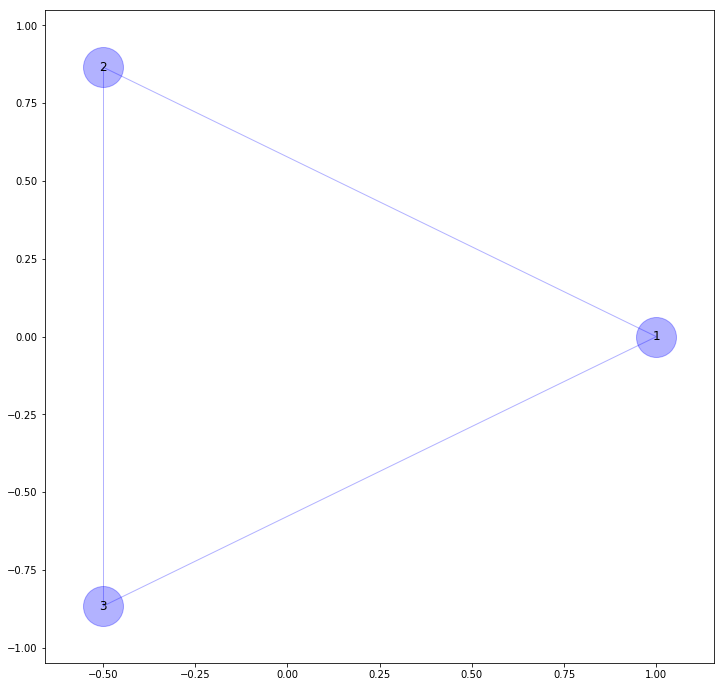

In [3]:
# run this cell for a few graphs of your choice
graph = [(1,2),(2,3),(1,3)]
draw_graph(graph)

Write a function that accepts an adjancency list (called `adjacency`) and outputs a list of tuples (called `graph`).

In [4]:
def adjacency_to_graph(adjacency):
    graph = []
    node=1
    #linking each node in the network to its neigbors from the adjacency list
    for i in adjacency:
        for j in i:
            if (node,j) and(j,node) not in graph:#considering undirected graphs
                graph.append((node,j))
        node+=1
    
    
    return graph

Tweak and run the code below to visualize a small social netowrk. 

done graph 101


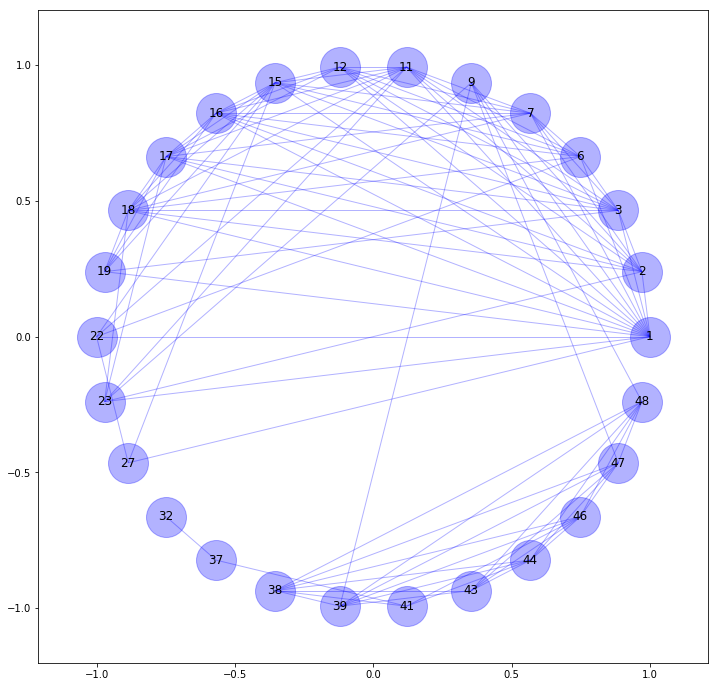

In [5]:
adjacency = build_adjacency('out.facebook-wosn-links.txt',4,50)
#print (adjacency)
graph = adjacency_to_graph(adjacency)
#print graph
print 'done graph', len(graph)
draw_graph(graph)

----

## Spreading Rumors over Social Networks 

**Susceptible-Infected Model. **
The susceptible-infected (SI) model states that the rumor starts at node $v^* \in G$ at $n=0$. We refer to $v^*$ as the rumor
source. At iteration $n=1$, $v^*$ can forward the rumor (uniformly at random) to 
**one and only one** of its neighbors. At iteration $n>1$, if node $v$ has the rumor, it can pass it to a node $u$ **if and only if** there is an edge between them.  This process is repeated in discrete time steps (iterations) until we have a total of $N$ nodes with the rumor. If a node $v$ has the rumor, we say that node $v$ is infected. If node $v$ passes the rumor to node $u$, we say that node $v$ infects node $u$. 

**Implementing the SI Model in Python. **
Given a social network represented by `adjacency` and a fixed number `N`, use
the SI model to infect `N` nodes starting from a randomly chosen rumor
source. In order to do so in Python, you can create a list (of empty lists)
called `who_infected` of `N` entries. This will store the
adjacency list of the infected sub-graph. You will also need to define a list
of size `N` that will keep track of the indices of the infected nodes
in the original underlying graph. Call this list `infected_nodes`.

Here is how you can fill up `who_infected` and
`infected_nodes`:

* At iteration `n = 0`, choose a source node `v*`
    uniformly at random from `{0, ..., num_nodes -1}`. If
    `adjacency[v*] = []` ignore the selected `v*` and redraw
    a new sample. Redo the aforementioned procedure (if needed) until you
    find a `v*` for which `adjacency[v*]` is not empty. Set
    `infected_nodes[0]=v*`. 
* At iteration `n = 1`, choose (uniformly at random) one of
    `v*`'s neighbors and infect it. Let's say the index of this
    infected node is `v_1`. Set
    `infected_nodes[1]=v_1` and update
    `who_infected` as follows:
    `who_infected[0]=[1]` and
    `who_infected[1]=[0]`. Notice that the node indices `v*` and `v_1` have been relabelled in the infected subgraph to become `0` and `1`, respectively.
* At iteration `n > 1`, consider the set of all susceptible nodes and infect **one** of them uniformly at random. The set of susceptible nodes: (a) contains the set of uninfected nodes that are connected to infected nodes: `v*`, `v_1`, ..., `v_{n-1}` (b) if an uninfected node is connected to $K$ infected nodes, then it must appear $K$ times in the list of susceptible nodes (each time for one of the infected nodes it's connected to). Let's say the index of the randomly chosen susceptible node is `v_n` and the index of the node that infected it is `v_k`. Set `infected_nodes[n]=v_n` and update `who_infected` as follows: append `n` to `who_infected[k]` and set `who_infected[n]=[k]`.
* Stop at iteration `n = N-1`.

**Simple Example. **
To better understand the details of the SI model, let's consider the following simple example. 

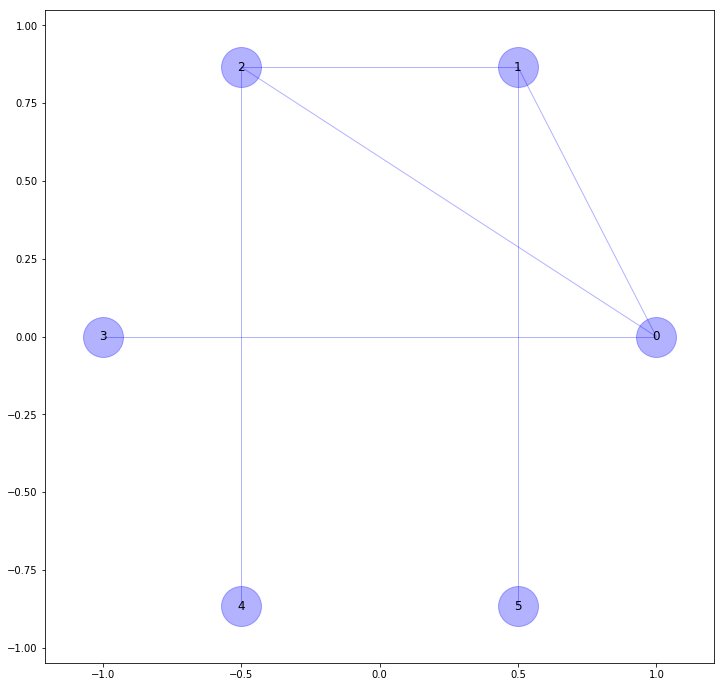

In [6]:
graph = [(0,1),(0,2),(0,3),(1,2),(1,5),(2,4)]
draw_graph(graph)

Let's assume  that node `0` is the rumor source. So, `infected_nodes[0] = 0` in this case. At `n = 1`, the susceptible list includes nodes `{1, 2, 3}`. Let's say you randomly select node `2` to be the second infected node. So, `infected_nodes[1] = 2`,  `who_infected[0] = 1`, and `who_infected[1] = 0`. At `n = 2`, the susceptible list includes nodes `{1, 3, 1, 4}`. Notice that node `1` appears twice since it can be infected by node `0` (hence the first occurrence) and by node `2` (hence the second occurrence). Let's say you randomly select the second occurrence of node `1` to be the third infected node. So, `infected_nodes[2] = 1`, `who_infected[1] = [0, 2]`, and `who_infected[2] = 1`. Make sure to remove the first occurrence of node `1` because you do not want to reinfect and already infected node at later iterations.

In [7]:
import random
import copy
from random import randrange
def generate_source(adjacency):
    # your code goes here
    s=True
    while s==True:
        source = randrange(1,len(adjacency)+1)
        if adjacency[source-1]!=[]:
            s=False
            break;
    return source

def si_model_rumor_spreading(source, adjancency, N):
    infected_nodes = [-1]*N;
    who_infected = [[] for i in range(N)]

    # adding the source node to the list of infected nodes
    infected_nodes[0] = source

    for i in range(1,N):
        #print i,'------'
        # your code goes here
        susceptible_nodes=[]#(contains the sets of uninfected nodes that are connected to infected nodes corresponding to each infected node)
        s=0#counter to keep track of index in infected_nodes list
        
        #to find the susceptible_nodes list, find adjacency of each infected node and store it in neighbour_s_n
        #remove elements in the adjacency which are already in the infected nodes list
        #if this list not empty append the list along with the index of the infected node to the susceptible_nodes list
        for s_n in infected_nodes:
            if s_n!=(-1):
                neighbour_s_n=[]
                neighbour_s_n=copy.copy(adjacency[s_n-1])
                #print '0' ,neighbour_s_n
                copy_neighbour_s_n=copy.copy(neighbour_s_n)
                for node in neighbour_s_n:
                    #print'1',node
                    if node in infected_nodes:
                        copy_neighbour_s_n.remove(node)
                        #print '01' ,neighbour_s_n
                if neighbour_s_n!=[]:
                    #print '01' ,neighbour_s_n
                    susceptible_nodes.append((copy_neighbour_s_n,s))
                s=s+1
        #print '2', susceptible_nodes
        #make sure that susceptible_nodes in not empty list
        #because then we can no longer spread the rumour
        if susceptible_nodes==[]:
            break;
        x=True
        while x==True:
            infected=True
            while infected==True:
                choose=random.choice(susceptible_nodes)# choosing a random set from susceptible nodes
                temp=susceptible_nodes.index(choose)
                while susceptible_nodes[temp][0]==[]:#in case if the chosen set is empty repeat the process till a nonempty set is found
                    choose=random.choice(susceptible_nodes)
                    temp=susceptible_nodes.index(choose)
                next_infected=random.choice(susceptible_nodes[temp][0])#choosing a random uninfected node
                #print next_infected
                #print infected_nodes
                if next_infected not in infected_nodes:#checking if this uninfceted node is in the infected node list
                    infected=False
                if infected==True:
                    susceptible_nodes.remove(choose)
            #print 'yaas'
            #once the infected node is chose
            #check if its adjacency is list is non empty after removing all infected nodes
            copy_infected=copy.deepcopy(adjacency[next_infected-1])
            y=copy.deepcopy(copy_infected)
            #print copy_infected
            for node in copy_infected :
                if node in infected_nodes:
                    #print 'yes',node
                    y.remove(node)
            if y !=[]:
                    x=False

        # if an uninfected node is connected to  K
        #infected nodes, then it must appear  K times in the list of susceptible nodes 
        #(each time for one of the infected nodes it's connected to).
        #Let's say the index of the randomly chosen susceptible node is v_n 
        #and the index of the node that infected it is v_k. 
        #Set infected_nodes[n]=v_n 
        #and update who_infected as follows: append n to who_infected[k] and set who_infected[n]=[k].
        who_infected[susceptible_nodes[temp][1]].append(i)
        who_infected[i]=[susceptible_nodes[temp][1]]
        #adding the next infected node to the infected_nodes list
        infected_nodes[i]=next_infected
        #print infected_nodes
    return who_infected, infected_nodes

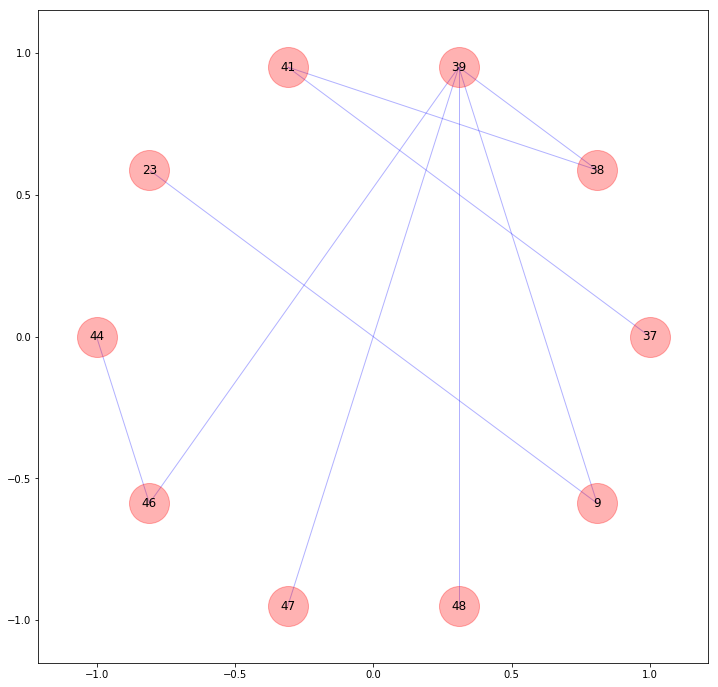

In [8]:
# run this script to test the above functions
N = 10
num_nodes = len(adjacency)
source = generate_source(adjacency)
who_infected, infected_nodes = si_model_rumor_spreading(source, adjacency, N)
#print infected_nodes
#print who_infected
graph = []
for i in xrange(N):
    for j in xrange(len(who_infected[i])):
        graph.append((infected_nodes[i], infected_nodes[who_infected[i][j]]))
draw_graph(graph, node_color = 'red')